<a href="https://colab.research.google.com/github/pame-olguin/challenge2-data-science-LATAM/blob/main/challenge2_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd


In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [4]:
df.shape

(7267, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
customer_df = pd.json_normalize(df['customer'])

In [7]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [8]:
phone_df = pd.json_normalize(df['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [9]:
internet_df = pd.json_normalize(df['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [10]:
account_df = pd.json_normalize(df['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df = pd.concat([df[['customerID','Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
import numpy as np

In [14]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce').astype(np.float64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
df['Charges.Total'].isnull().sum()


np.int64(11)

In [17]:
df['Charges.Total'] = df['Charges.Total'].fillna(0)


In [18]:
df['Charges.Total'].isnull().sum()


np.int64(0)

In [19]:
df_duplicados = df[df.duplicated()]
print(df_duplicados)


Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


##Explorando los valores únicos todas las columnas categóricas object

In [20]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:", df[col].unique())


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [21]:
df['Churn'] = df['Churn'].replace('', 'no se sabe') #reemplazar ' ' por 'no se sabe'

In [22]:
df['Churn'].unique()

array(['No', 'Yes', 'no se sabe'], dtype=object)

In [23]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols:
    df[col] = df[col].replace('No internet service', 'No')

In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [25]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:", df[col].unique())


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' 'no se sabe']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['Yes' 'No']

StreamingTV: ['Yes' 'No']

StreamingMovies: ['No' 'Yes']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [26]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [27]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:", df[col].unique())


customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Churn: ['no' 'yes' 'no se sabe']

gender: ['female' 'male']

Partner: ['yes' 'no']

Dependents: ['yes' 'no']

PhoneService: ['yes' 'no']

MultipleLines: ['no' 'yes']

InternetService: ['dsl' 'fiber optic' 'no']

OnlineSecurity: ['no' 'yes']

OnlineBackup: ['yes' 'no']

DeviceProtection: ['no' 'yes']

TechSupport: ['yes' 'no']

StreamingTV: ['yes' 'no']

StreamingMovies: ['no' 'yes']

Contract: ['one year' 'month-to-month' 'two year']

PaperlessBilling: ['yes' 'no']

PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [28]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


##Creando nueva columna 'Cuentas_diarias'

In [29]:
df['Cuentas_diarias']= df['Charges.Monthly']/30
df['Cuentas_diarias']
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [30]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_diarias     0
dtype: int64


##convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)

In [31]:
bin_map = {'yes': 1, 'no': 0}

cols_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in cols_binarias:
    df[col] = df[col].map(bin_map)

In [32]:
df['Churn'] = df['Churn'].map({'yes': 1, 'no': 0, 'no se sabe': -1})

In [33]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_mayor',
    'Partner': 'Tiene_pareja',
    'Dependents': 'Tiene_dependientes',
    'tenure': 'Antiguedad_meses',
    'PhoneService': 'Servicio_telefonico',
    'MultipleLines': 'Multiples_lineas',
    'InternetService': 'Tipo_internet',
    'OnlineSecurity': 'Seguridad_en_linea',
    'OnlineBackup': 'Copia_seguridad',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'TV_streaming',
    'StreamingMovies': 'Peliculas_streaming',
    'Contract': 'Tipo_contrato',
    'PaperlessBilling': 'Facturacion_sin_papel',
    'PaymentMethod': 'Metodo_pago',
    'Charges.Monthly': 'Cargos_mensuales',
    'Charges.Total': 'Cargos_totales',
    'Cuentas_diarias': 'Costo_diario'
})

In [34]:
df.head()

,ID_cliente,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [35]:
df['Genero'] = df['Genero'].replace({'male': 'hombre', 'female': 'mujer'})

In [36]:
df['Genero']

,Genero
0,mujer
1,hombre
2,hombre
3,hombre
4,mujer
...,...
7262,mujer
7263,hombre
7264,hombre
7265,hombre


In [37]:
df['Tipo_internet'] = df['Tipo_internet'].replace({
    'dsl': 'DSL',
    'fiber optic': 'Fibra óptica',
    'no': 'Sin internet'
})

In [38]:
df['Tipo_contrato'] = df['Tipo_contrato'].replace({
    'month-to-month': 'Mensual',
    'one year': 'Anual',
    'two year': 'Bianual'
})

In [39]:
df['Metodo_pago'] = df['Metodo_pago'].replace({
    'bank transfer (automatic)': 'Transferencia bancaria (automática)',
    'credit card (automatic)': 'Tarjeta de crédito (automática)',
    'electronic check': 'Cheque electrónico',
    'mailed check': 'Cheque por correo'
})

In [40]:
df.head()

,ID_cliente,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario
0,0002-orfbo,0,mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por correo,65.6,593.30,2.186667
1,0003-mknfe,0,hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por correo,59.9,542.40,1.996667
2,0004-tlhlj,1,hombre,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,0011-igkff,1,hombre,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,0013-exchz,1,mujer,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.796667


##**Analisis Descriptivo**##

In [41]:
df.describe()

,Cancelacion,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Seguridad_en_linea,Copia_seguridad,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Facturacion_sin_papel,Cargos_mensuales,Cargos_totales,Costo_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.486627,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [42]:
print("🔹 Cargos mensuales:")
print("Media:", df['Cargos_mensuales'].mean())
print("Mediana:", df['Cargos_mensuales'].median())
print("Desviación estándar:", df['Cargos_mensuales'].std())
print("Mínimo:", df['Cargos_mensuales'].min())
print("Máximo:", df['Cargos_mensuales'].max())
print("")

🔹 Cargos mensuales:
Media: 64.72009770194028
Mediana: 70.3
Desviación estándar: 30.12957188566699
Mínimo: 18.25
Máximo: 118.75



In [43]:
print("🔹 Cargos totales:")
print("Media:", df['Cargos_totales'].mean())
print("Mediana:", df['Cargos_totales'].median())
print("Desviación estándar:", df['Cargos_totales'].std())
print("")

🔹 Cargos totales:
Media: 2277.182035227742
Mediana: 1389.2
Desviación estándar: 2268.648586624864



In [44]:
print("🔹 Costo diario:")
print("Media:", df['Costo_diario'].mean())
print("Mediana:", df['Costo_diario'].median())
print("Desviación estándar:", df['Costo_diario'].std())

🔹 Costo diario:
Media: 2.1573365900646757
Mediana: 2.3433333333333333
Desviación estándar: 1.0043190628555607


In [45]:
df['Cancelacion'].value_counts() #1(cancelaron), 0(No cancelaron) -1(no se sabe)

,count
Cancelacion,
0,5174
1,1869
-1,224


In [46]:
df_Cancelacion = df[df['Cancelacion'] != -1]

porcentaje = df_Cancelacion['Cancelacion'].value_counts(normalize=True) * 100
print(porcentaje)

Cancelacion
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [47]:
df.groupby('Cancelacion')[['Cargos_mensuales', 'Cargos_totales', 'Costo_diario', 'Antiguedad_meses']].describe()

Cargos_mensuales                                               \
                       count       mean        std    min     25%     50%   
Cancelacion                                                                 
-1                     224.0  63.412277  31.388712  18.75  28.425  69.100   
 0                    5174.0  61.265124  31.092648  18.25  25.100  64.425   
 1                    1869.0  74.441332  24.666053  18.85  56.150  79.650   

                             Cargos_totales               ... Costo_diario  \
                 75%     max          count         mean  ...          75%   
Cancelacion                                               ...                
-1           90.4125  115.55          224.0  2196.933705  ...     3.013750   
 0           88.4000  118.75         5174.0  2549.911442  ...     2.946667   
 1           94.2000  118.35         1869.0  1531.796094  ...     3.140000   

                      Antiguedad_meses                                         \
                  max            count       mean        std  min   25%   50%   
Cancelacion                                                                     
-1           3.851667            224.0  31.571429  24.998552  1.0   7.0  29.0   
 0           3.958333           5174.0  37.569965  24.113777  0.0  15.0  38.0   
 1           3.945000           1869.0  17.979133  19.531123  1.0   2.0  10.0   

                         
              75%   max  
Cancelacion              
-1           56.0  72.0  
 0           61.0  72.0  
 1           29.0  72.0  

[3 rows x 32 columns]

In [48]:
import matplotlib.pyplot as plt





In [49]:
print(df['Cancelacion'].unique())

[ 0  1 -1]


In [50]:
df_filtrado = df[df['Cancelacion'].isin([0, 1])]

conteo = df_filtrado['Cancelacion'].value_counts()
conteo.index = ['Permaneció', 'Canceló']

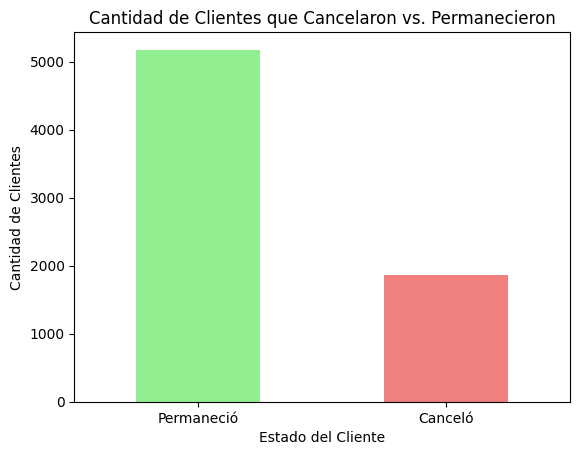

In [51]:

conteo.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Cantidad de Clientes que Cancelaron vs. Permanecieron')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

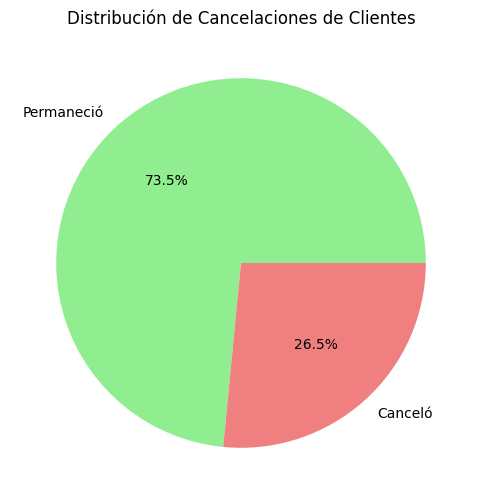

In [52]:
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribución de Cancelaciones de Clientes')
plt.show()

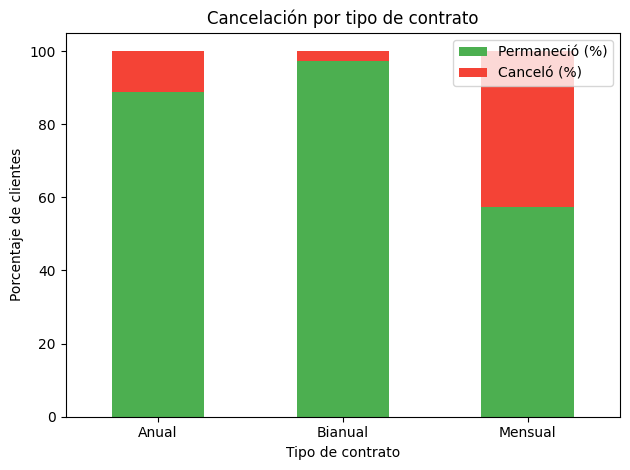

In [53]:
import seaborn as sns

# datos filtrados (sin -1 en Cancelacion)
df_Cancelacion = df[df['Cancelacion'] != -1]

# Creando tabla de frecuencias cruzadas
contrato_churn = pd.crosstab(df_Cancelacion['Tipo_contrato'], df_Cancelacion['Cancelacion'], normalize='index') * 100

# Renombrar columnas para claridad
contrato_churn.columns = ['Permaneció (%)', 'Canceló (%)']

# Gráfico de barras apiladas
contrato_churn.plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'])

plt.title('Cancelación por tipo de contrato')
plt.ylabel('Porcentaje de clientes')
plt.xlabel('Tipo de contrato')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

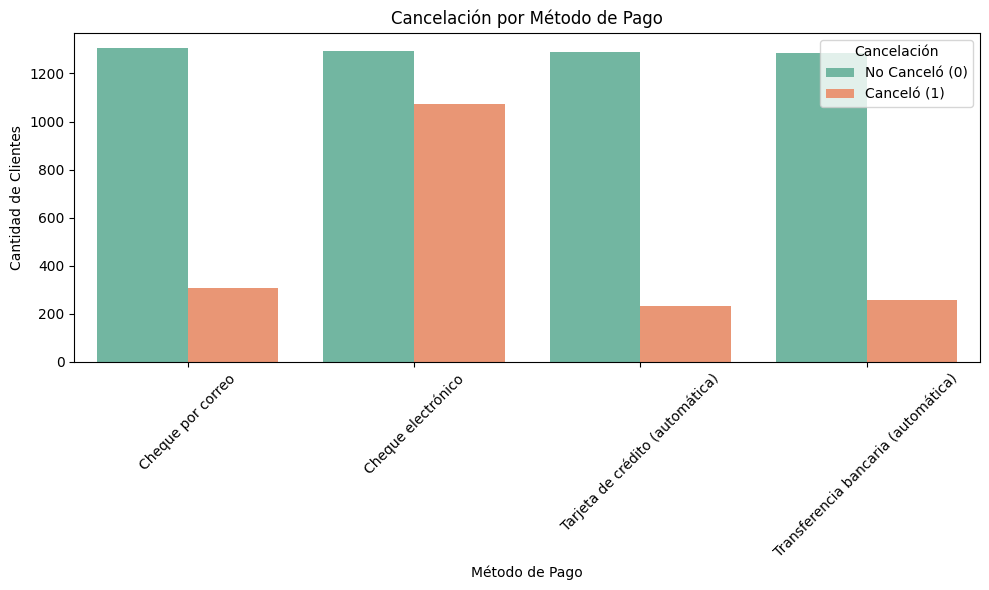

In [54]:
df_Cancelacion = df[df['Cancelacion'] != -1]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_Cancelacion, x='Metodo_pago', hue='Cancelacion', palette='Set2')

plt.title('Cancelación por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Cancelación', labels=['No Canceló (0)', 'Canceló (1)'])
plt.tight_layout()
plt.show()

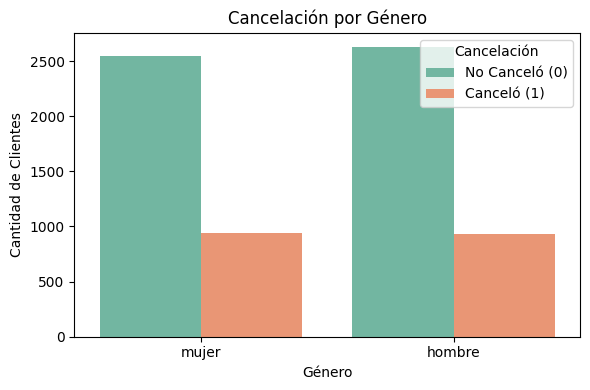

In [55]:
df_Cancelacion =df[df['Cancelacion'] !=-1]

plt.figure(figsize=(6, 4))
sns.countplot(data=df_Cancelacion, x='Genero', hue='Cancelacion', palette='Set2')

plt.title('Cancelación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Cancelación', labels=['No Canceló (0)', 'Canceló (1)'])
plt.tight_layout()
plt.show()

In [56]:
df_filtrado_copia = df[df['Cancelacion'] != -1].copy()  # Aquí se crea la copia independiente

df_filtrado_copia['Cancelacion_str'] = df_filtrado_copia['Cancelacion'].map({0: 'Permaneció', 1: 'Canceló'})
df_filtrado_copia['Facturacion_str'] = df_filtrado_copia['Facturacion_sin_papel'].map({0: 'Con papel', 1: 'Sin papel'})





In [57]:
print(df_filtrado.columns)



Index(['ID_cliente', 'Cancelacion', 'Genero', 'Ciudadano_mayor',
       'Tiene_pareja', 'Tiene_dependientes', 'Antiguedad_meses',
       'Servicio_telefonico', 'Multiples_lineas', 'Tipo_internet',
       'Seguridad_en_linea', 'Copia_seguridad', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV_streaming', 'Peliculas_streaming',
       'Tipo_contrato', 'Facturacion_sin_papel', 'Metodo_pago',
       'Cargos_mensuales', 'Cargos_totales', 'Costo_diario'],
      dtype='object')


In [58]:
df_filtrado = df[df['Cancelacion'] != -1].copy()  # Copia independiente

df_filtrado['Cancelacion_str'] = df_filtrado['Cancelacion'].map({0: 'Permaneció', 1: 'Canceló'})
df_filtrado['Facturacion_str'] = df_filtrado['Facturacion_sin_papel'].map({0: 'Con papel', 1: 'Sin papel'})

In [59]:
print(df_filtrado.columns)


Index(['ID_cliente', 'Cancelacion', 'Genero', 'Ciudadano_mayor',
       'Tiene_pareja', 'Tiene_dependientes', 'Antiguedad_meses',
       'Servicio_telefonico', 'Multiples_lineas', 'Tipo_internet',
       'Seguridad_en_linea', 'Copia_seguridad', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'TV_streaming', 'Peliculas_streaming',
       'Tipo_contrato', 'Facturacion_sin_papel', 'Metodo_pago',
       'Cargos_mensuales', 'Cargos_totales', 'Costo_diario', 'Cancelacion_str',
       'Facturacion_str'],
      dtype='object')


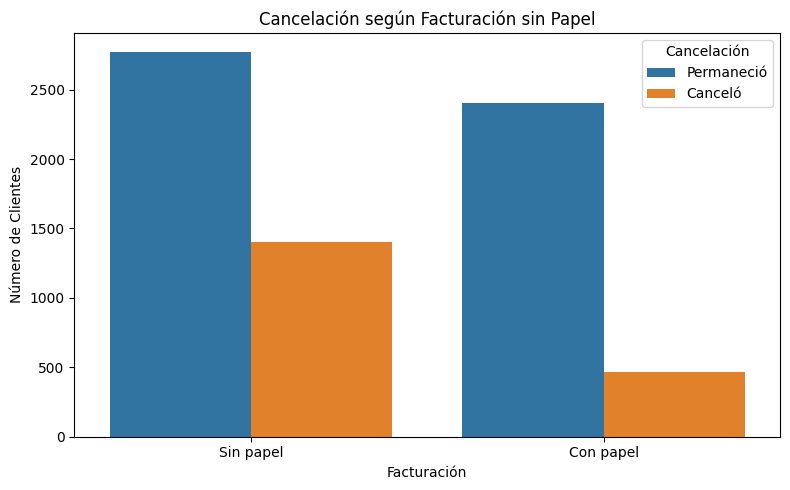

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtrado, x='Facturacion_str', hue='Cancelacion_str')
plt.title('Cancelación según Facturación sin Papel')
plt.xlabel('Facturación')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()


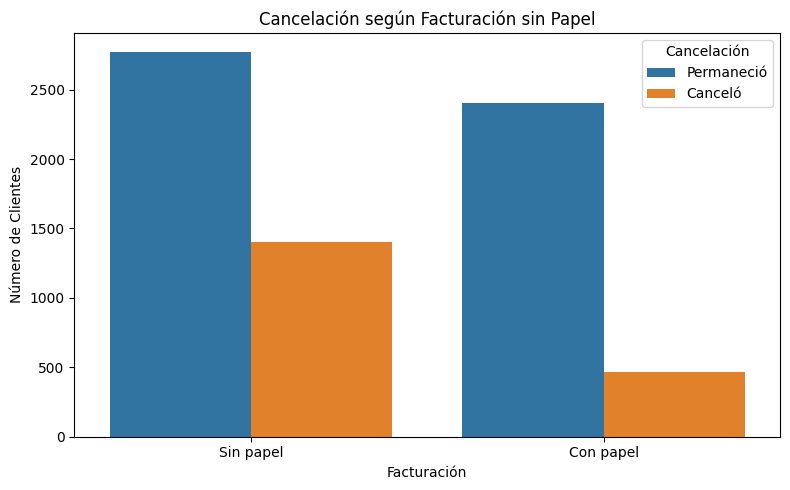

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtrado, x='Facturacion_str', hue='Cancelacion_str')
plt.title('Cancelación según Facturación sin Papel')
plt.xlabel('Facturación')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()

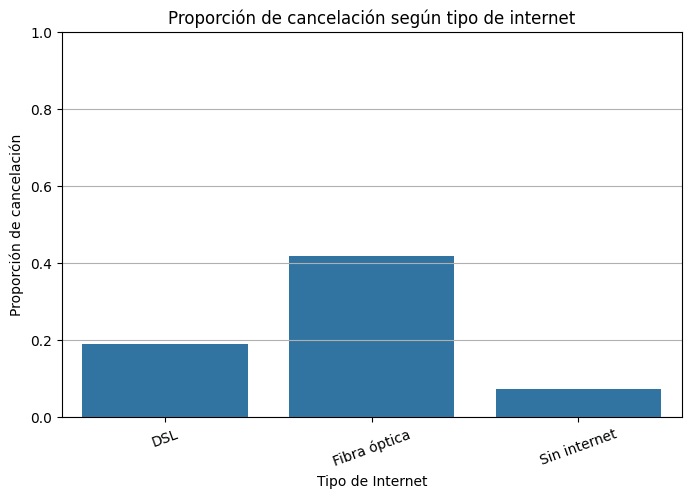

In [62]:
df_Cancelacion = df[df['Cancelacion'].isin([0, 1])]

# Crear gráfico de proporción de cancelación por tipo de internet
plt.figure(figsize=(8, 5))
sns.barplot(data=df_Cancelacion, x='Tipo_internet', y='Cancelacion', estimator=lambda x: sum(x)/len(x), errorbar=None)

plt.title('Proporción de cancelación según tipo de internet')
plt.ylabel('Proporción de cancelación')
plt.xlabel('Tipo de Internet')
plt.ylim(0, 1)  # Para que vaya de 0 a 100%
plt.xticks(rotation=20)
plt.grid(axis='y')

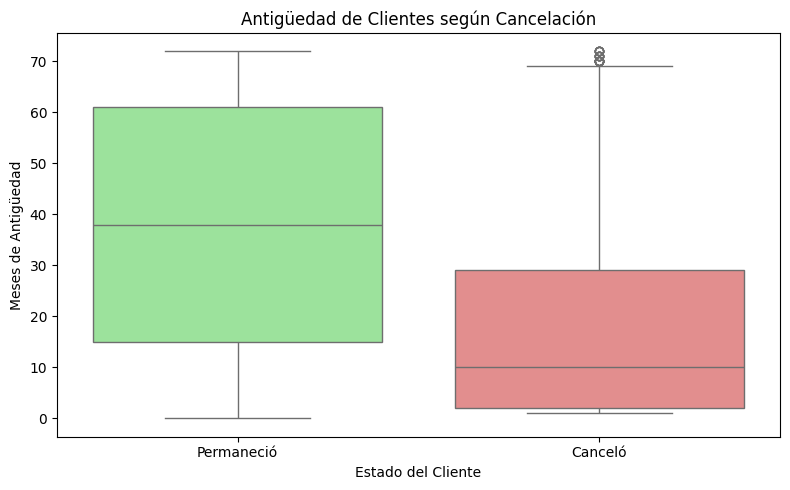

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtrado, x='Cancelacion_str', y='Antiguedad_meses', hue='Cancelacion_str', palette=['lightgreen', 'lightcoral'], legend=False)

plt.title('Antigüedad de Clientes según Cancelación')
plt.xlabel('Estado del Cliente')
plt.ylabel('Meses de Antigüedad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [64]:
umbral = df_filtrado['Antiguedad_meses'].quantile(0.90)  # Clientes con antigüedad en el 10% más alto
outliers = df_filtrado[df_filtrado['Antiguedad_meses'] > umbral]
print(outliers[['ID_cliente', 'Antiguedad_meses', 'Cancelacion_str']])



      ID_cliente  Antiguedad_meses Cancelacion_str
6     0013-smeoe                71      Permaneció
11    0017-iudmw                72      Permaneció
13    0019-efaep                72      Permaneció
15    0020-inwck                71      Permaneció
46    0078-xzmht                72      Permaneció
...          ...               ...             ...
7215  9924-jprmc                72      Permaneció
7216  9926-pjhdq                72      Permaneció
7241  9958-mekuc                72      Permaneció
7242  9959-wofkt                71      Permaneció
7245  9964-wbqdj                71      Permaneció

[651 rows x 3 columns]


In [65]:
df_cancelaron = df_filtrado[df_filtrado['Cancelacion_str'] == 'Canceló']
print(df_cancelaron[['ID_cliente', 'Antiguedad_meses']].describe())

       Antiguedad_meses
count       1869.000000
mean          17.979133
std           19.531123
min            1.000000
25%            2.000000
50%           10.000000
75%           29.000000
max           72.000000


In [66]:
print(df_filtrado['Antiguedad_meses'].describe())


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Antiguedad_meses, dtype: float64


In [67]:
outliers_cancelaron = df_filtrado[(df_filtrado['Antiguedad_meses'] > 70) & (df_filtrado['Cancelacion_str'] == 'Canceló')]
print(outliers_cancelaron[['ID_cliente', 'Antiguedad_meses']])


      ID_cliente  Antiguedad_meses
644   0917-ezola                72
1782  2530-endwq                71
2007  2834-jrtua                71
2053  2889-fpwrm                72
2340  3259-fdwoy                71
2802  3886-certz                72
3860  5287-qwlky                71
4407  6034-zrycv                72
4788  6559-ilwkj                71
5357  7317-ggvpb                71
6236  8580-qvloc                72
6416  8809-rihdd                72


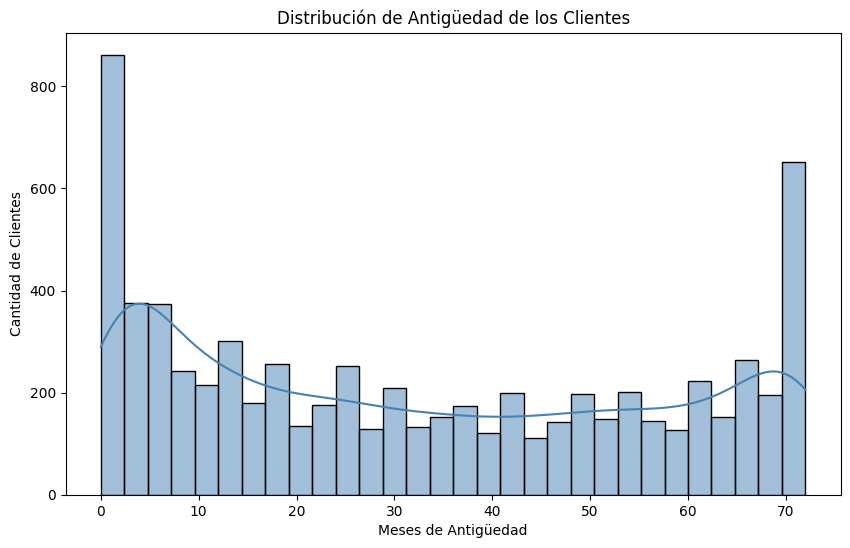

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Antiguedad_meses'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de Antigüedad de los Clientes')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.show()


In [69]:
df_filtrado.groupby('Cancelacion')[['Cargos_totales', 'Antiguedad_meses', 'Cargos_mensuales', 'Costo_diario']].describe()

Cargos_totales                                                    \
                     count         mean          std    min    25%       50%   
Cancelacion                                                                    
0                   5174.0  2549.911442  2329.954215   0.00  572.9  1679.525   
1                   1869.0  1531.796094  1890.822994  18.85  134.5   703.550   

                              Antiguedad_meses             ...  \
                 75%      max            count       mean  ...   
Cancelacion                                                ...   
0            4262.85  8672.45           5174.0  37.569965  ...   
1            2331.30  8684.80           1869.0  17.979133  ...   

            Cargos_mensuales         Costo_diario                      \
                         75%     max        count      mean       std   
Cancelacion                                                             
0                       88.4  118.75       5174.0  2.042171  1.036422   
1                       94.2  118.35       1869.0  2.481378  0.822202   

                                                             
                  min       25%     50%       75%       max  
Cancelacion                                                  
0            0.608333  0.836667  2.1475  2.946667  3.958333  
1            0.628333  1.871667  2.6550  3.140000  3.945000  

[2 rows x 32 columns]

<ipython-input-70-604701614>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cancelación')


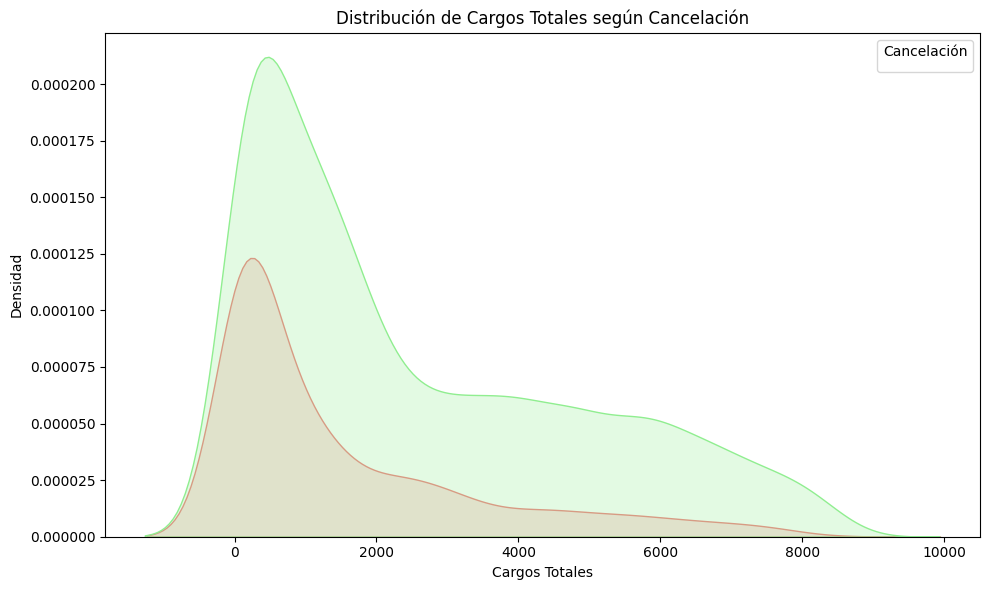

In [70]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtrado, x='Cargos_totales', hue='Cancelacion_str', fill=True, palette=['lightgreen', 'lightcoral'])
plt.title('Distribución de Cargos Totales según Cancelación')
plt.xlabel('Cargos Totales')
plt.ylabel('Densidad')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()


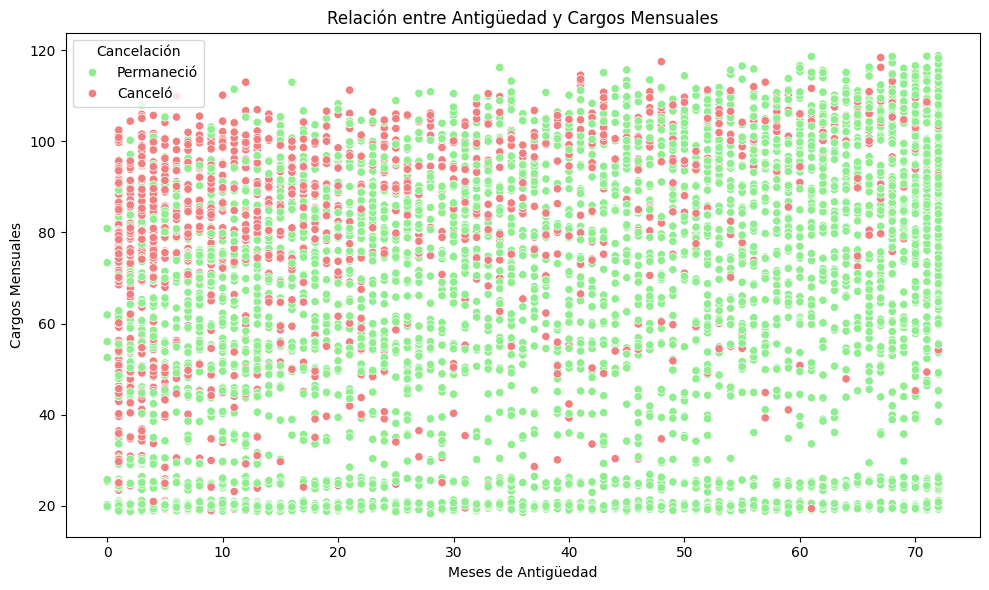

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtrado, x='Antiguedad_meses', y='Cargos_mensuales', hue='Cancelacion_str', palette=['lightgreen', 'lightcoral'])
plt.title('Relación entre Antigüedad y Cargos Mensuales')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cargos Mensuales')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()


<ipython-input-72-2557574084>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='Cancelacion_str', y='Cargos_mensuales', palette=['lightgreen', 'lightcoral'])


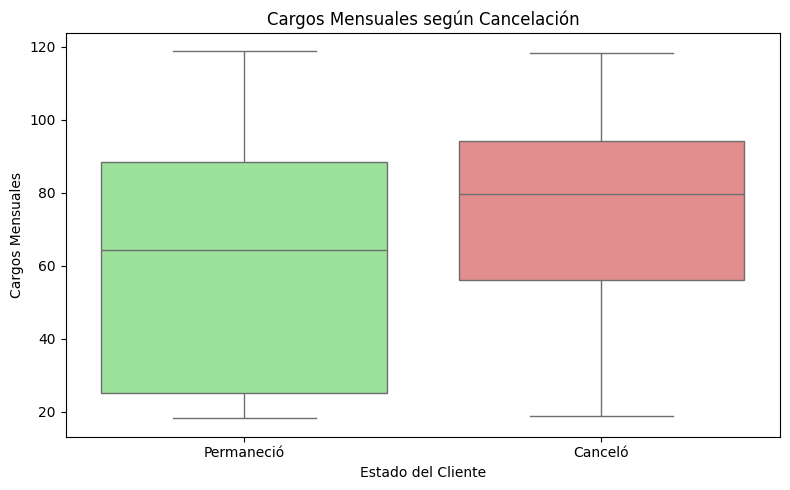

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtrado, x='Cancelacion_str', y='Cargos_mensuales', palette=['lightgreen', 'lightcoral'])
plt.title('Cargos Mensuales según Cancelación')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cargos Mensuales')
plt.tight_layout()
plt.show()


In [73]:
df_filtrado.groupby('Tipo_contrato')['Cancelacion'].mean()

,Cancelacion
Tipo_contrato,
Anual,0.112695
Bianual,0.028319
Mensual,0.427097


In [74]:
df_filtrado.corr(numeric_only=True)['Cancelacion'].sort_values(ascending=False)

,Cancelacion
Cancelacion,1.000000
Cargos_mensuales,0.193356
Costo_diario,0.193356
Facturacion_sin_papel,0.191825
Ciudadano_mayor,0.150889
TV_streaming,0.063228
Peliculas_streaming,0.061382
Multiples_lineas,0.040102
Servicio_telefonico,0.011942
Proteccion_dispositivo,-0.066160


<ipython-input-75-280899128>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')


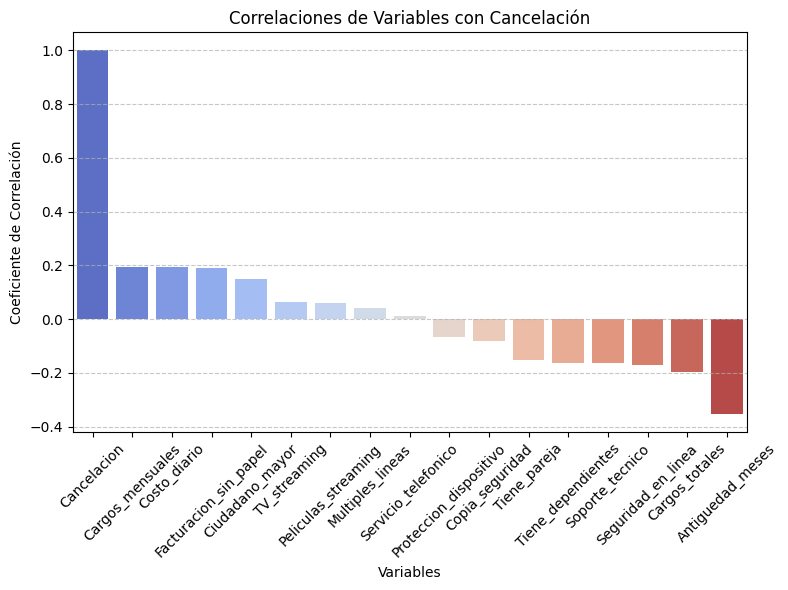

In [75]:
# Calcular la correlación con Cancelación y ordenar
correlaciones = df_filtrado.corr(numeric_only=True)['Cancelacion'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')

plt.title('Correlaciones de Variables con Cancelación')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**Informe de Análisis de Evasión de clientes (TelecomX)**

##**Introducción**

El objetivo de este análisis es identificar los factores que influyen en la cancelación del servicio por parte de los clientes.

A través de este estudio, buscamos descubrir qué características tienen los clientes que cancelan y proporcionar estrategias para reducir la tasa de cancelación.

##**Limpieza y tratamiento de los datos**

Antes de realizar el análisis, se realizaron las siguientes acciones para preparar los datos correctamente:

✅ **Importación de datos** desde una API en formato Json.

✅**Conversión de datos y normalización** para transformar información estructurada en columnas separadas.

✅**Manejo de valores faltantes** en columnas "Cancelaciones" reemplazando '' por 'no se sabe ' y en columna "Cargos Totales" remplazando los NaN por '0'.

✅**Estandarización del texto** de mayúsculas a minúsculas para evitar duplicados en las categorías.

✅**Conversión de varialbles binarias** de "yes" ,"no" "no se sabe" a "0","1" y "-1" respectivamente para facilitar análisis numéricos.

✅**Renombramiento de columnas** de inglés a español para mejorar la legibilidad.

##**Análisis exploratorio de datos**

Se realizaron visualizaciones para detectar patrones en la cancelación de clientes:

📊**Distribicción de las cancelaciones**: Un gráfico de barras y un pie chart mostraron que aproximadamente el **26.5%** de los clientes han **cancelado su servicio**, mientras que el **73.5% permanecen**.

📊 **Gráfico: Distribución de Cancelación**

El siguiente gráfico muestra cuántos clientes cancelaron su servicio.






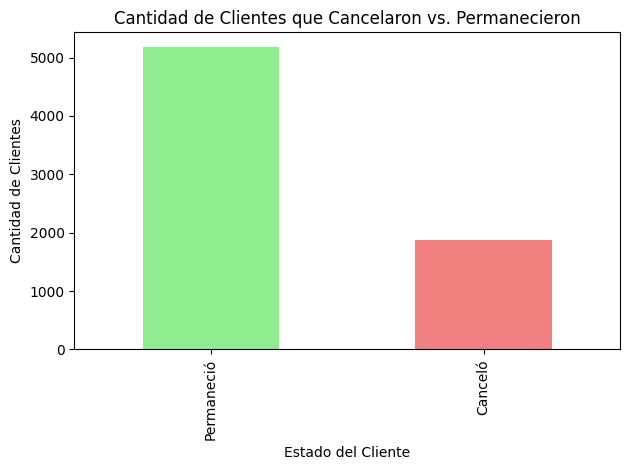

In [76]:
# Celda de código para el gráfico
import seaborn as sns
import matplotlib.pyplot as plt

conteo = df_filtrado['Cancelacion_str'].value_counts()
conteo.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Cantidad de Clientes que Cancelaron vs. Permanecieron')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

📉**Cancelación por tipo de contrato**:Los clientes con **contrato mensual tienen la tasa de cancelación más alta (42.7%)**, mientras que los contratos bianuales casi no presentan cancelaciones.

 💳**Cancelación por método de pago**: El análisis reveló que algunos métodos de pago electrónicos tienen una cancelación más alta en comparación con transferencias automáticas.

📊**Distribución de cargos totales**:
Los clientes que cancelan **tienen un gasto total significativamente menor**, lo que sugiere que abandonan el servicio antes de acumular pagos elevados.

## 📈 Distribución de Cargos Totales

Este gráfico compara los cargos totales acumulados por clientes que cancelaron y los que no.

Nos ayuda a ver si los clientes que pagan más tienden a quedarse.






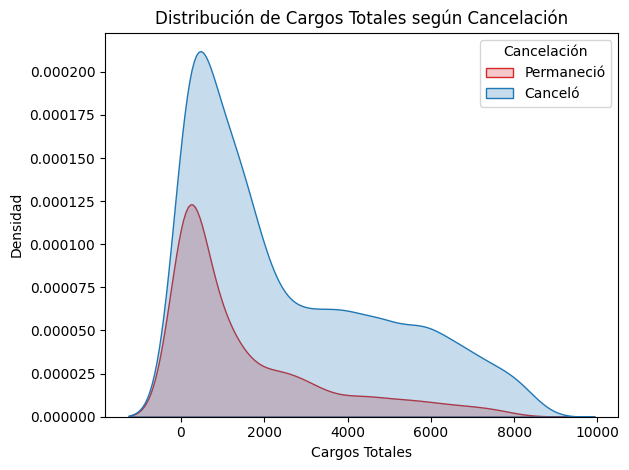

In [78]:
sns.kdeplot(data=df_filtrado, x='Cargos_totales', hue='Cancelacion_str', fill=True, palette=['#1f77b4', '#d62728'])  # Azul y rojo intenso
plt.title('Distribución de Cargos Totales según Cancelación')
plt.xlabel('Cargos Totales')
plt.ylabel('Densidad')
plt.legend(title='Cancelación', labels=['Permaneció', 'Canceló'])
plt.tight_layout()
plt.show()


📉**Cancelación según antiguedad**:El boxplot mostró que los clientes que cancelan suelen tener **menos meses de antigüedad**, con un promedio de **18 meses**, mientras que los que permanecen tienen **37 meses**.

⌛ **Antigüedad vs. Cancelación**

El siguiente gráfico muestra si los clientes con más tiempo en la empresa tienen mayor probabilidad de quedarse.

<ipython-input-79-880142359>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='Cancelacion_str', y='Antiguedad_meses', palette=['lightgreen', 'lightcoral'])


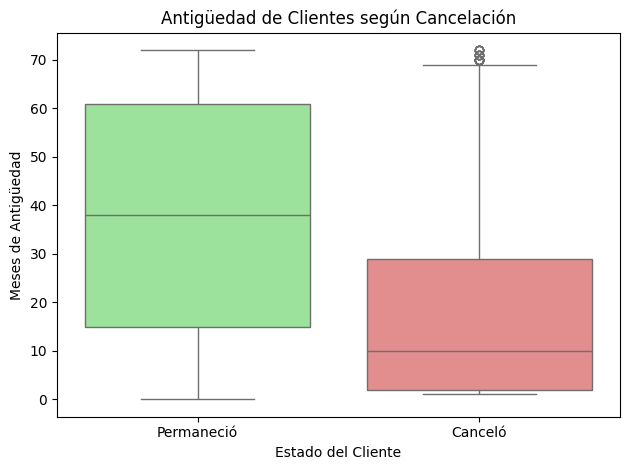

In [79]:
sns.boxplot(data=df_filtrado, x='Cancelacion_str', y='Antiguedad_meses', palette=['lightgreen', 'lightcoral'])
plt.title('Antigüedad de Clientes según Cancelación')
plt.xlabel('Estado del Cliente')
plt.ylabel('Meses de Antigüedad')
plt.tight_layout()
plt.show()

📈**Correlaciones con cancelación**:
Se realizó un análisis de correlaciones que reveló:

- **Los clientes con mayor antiguedad cancelan menos** (corr=-0.35).
-**Los cargos mensuales altos están relacionados con más cancelaciones** (corr=0.19).
-**La facturación sin papel tiene corelación positiva con la cancelación** lo que podría indicar diferencias en la percepción del servicio.

🔍 **Correlaciones con Cancelación**

Aquí se muestra qué variables numéricas están más relacionadas con la cancelación, facilitando la identificación de factores clave.


<ipython-input-81-4187749889>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')


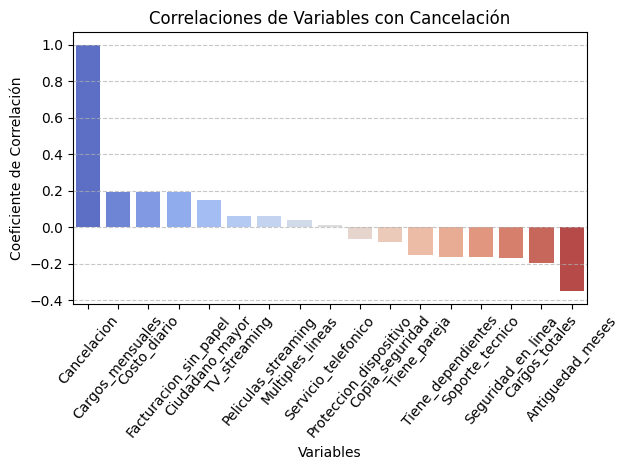

In [81]:
correlaciones = df_filtrado.corr(numeric_only=True)['Cancelacion'].sort_values(ascending=False)

sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')
plt.title('Correlaciones de Variables con Cancelación')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##**Conclusiones e Insights**

✅**Los clientes nuevos son más propensos a cancelar**, lo que destaca la importancia de estrategias de retención en los primeros meses.

✅**Los contratos mensuales presentan una cancelación elevada**,lo que sugiere que los planes a largo plazo pueden mejorar la retención.

✅**Los clientes con cargos mensuales altos tienden a cancelar más**lo que puede indicar que el costo percibido no se alinea con el valor del servicio.

✅**Los clientes que tienen soporte técnico y seguridad en línea tienen menor cancelación**lo que resalta la importancia de ofrecer servicios complementarios.

✅**La facturación sin papel tiene una tasa de cancelación más alta**,lo que podría estar relacionado con la percepción del servicio y la comunicación.

##**Recomendaciones estratégicas**

✅**Retención en los primeros meses** ➡ Ofrecer descuentos, soporte proactivo y programas de fidelización.

✅**Optimizar planes de contrato** ➡ Incentivar a clientes mensuales a migrar a planes anuales con beneficios exclusivos.

✅**Analizar métodos de pago** ➡ Evaluar por qué la facturación electrónica tiene más cancelación.

✅**Fortalecer la comunicación** ➡ Mejorar la percepción de clientes con facturación sin papel.

✅**Promover servicios adicionales** ➡ Fomentar el uso de seguridad en línea y soporte técnico para reducir evasión.







